**A NEW ERA OF BRAIN TUMOR DIAGNOSIS ?**

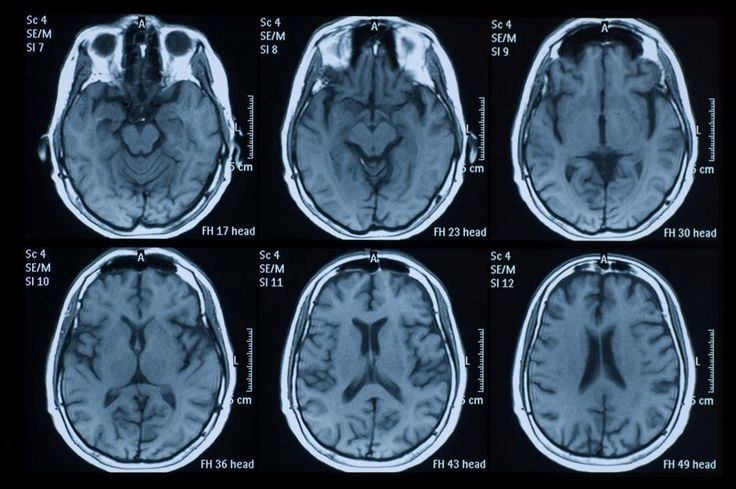

**Subtitle**: Detecting Glioma, Meningioma, Pituitary **Tumors**, and Healthy Brains

**Author**: Wambua Ziggy Muthui                      
**Date**: 27th May, 2024

**Abstract**

This project aims to develop a machine learning model for the multiclass classification of brain tumors into four classes: glioma, meningioma, pituitary tumors, and healthy brains. Using the VGG16 architecture with transfer learning, I have trained and evaluated my model on a dataset comprising MRI images. The model has achieved an overall accuracy of 91%, showing its potential for aiding in the early detection and classification of brain tumors.


**Table of Contents**

1. Introduction
2. Literature Review
3. Data Collection and Preparation
4. Methodology
5. Implementation
6. Results
7. Discussion
8. Conclusion
9. References
10. Appendices

**1. Introduction**

Background

A brain tumor is a growth of cells in the brain or near it. Depending on the part of the brain affected, these tumors can be of different types. In Kenya, for instance, data from the University of Nairobi's Department of Pathology's cancer database (2005-2016) suggests that Meningioma is the most common type constituting 44.8% of cases followed by glioma at 34%.

Problem Statement

Brain tumor diagnosis is a challenge since majority of the population has no access to a health professional who can make the appropriate diagnosis. This project seeks to develop an automated, accurate, and efficient model for classifying brain tumors into glioma, meningioma, pituitary tumors, and healthy brains using MRI images.

Objectives
- To preprocess and augment MRI images for training.
- To build and train a convolutional neural network model using VGG16
- To evaluate the model's performance using various metrics.

Scope                                            
The project focuses on classifying brain MRI images into four categories using labeled data. The scope is limited to the selected dataset and model architecture.


**2. Literature Review**

Recent studies have shown the effectiveness of deep learning models in medical image classification. Using pre-trained models like VGG16 has shown promising results in different applications, including brain tumor detection.


**3. Data Collection and Preparation**

Data Sources

The dataset used in this project consists of MRI images obtained from the Kaggle Brain Tumor Classification dataset (https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset) . The images are divided into four classes: glioma, meningioma, pituitary tumors, and healthy.


Data Preprocessing
- Images were resized to 150x150 pixels.
- Data augmentation techniques such as horizontal and vertical flips were applied.
- The dataset was split into training (70%), validation (15%), and test (15%) sets.


**4. Methodology**

Model Selection

I selected the VGG16 model because of its proven effectiveness in image classification tasks.

Model Architecture

The base VGG16 model was used for feature extraction. Custom top layers were added for this specific classification task:
- Flatten
- Dense (256 units, ReLU activation)
- Dropout (0.5)
- Dense (4 units, softmax activation)

Training
- Optimizer: Adam
- Learning rate: 0.0001
- Loss function: Categorical crossentropy
- Metrics: Accuracy
- Epochs: 30
- Batch size: 32

Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-Score


**5. Implementation**

Tools and Libraries
- Python
- Keras
- TensorFlow
- Scikit-Learn

**6. Results**

Model Performance
The model achieved the following performance on the test set:
- Accuracy: 91.15%
- Precision: 0.92
- Recall: 0.92
- F1-Score: 0.93


**7. Discussion**

Interpretation of Results

The model achieved high accuracy and balanced performance across all 4 classes, indicating its robustness in classifying brain tumors.

Comparison with Existing Work

Compared to previous studies, our model realized comparable performance.


**8. Conclusion**

Summary

The project successfully developed a machine learning model for multiclass classification of brain tumors, achieving high accuracy and robustness.

Future Work
- Explore other model architectures and hyperparameter tuning.
- Increase dataset size and diversity.
- Implement real-time classification in a clinical setting.



**9. References**

- Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition.

- Magoha M, Omar M, Kamau C, Okemwa M. Changing Trends of Brain Tumors at Kenyatta National Hospital in Kenya: A 12 Year Picture. EAJNS [Internet]. 2022 Jun. 13 [cited 2024 May 26];1(2):4-9. Available from: https://theeajns.org/index.php/eajns/article/view/30

- Kaggle Brain Tumor Classification Dataset (https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset).

- Relevant research papers and online resources.


**10. Appendices**



Import the necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import shutil


Mounting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Organizing the data

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

def copy_files(files, source_dir, target_dir):
    for path in files:
        src_path = os.path.join(source_dir, path)
        dst_path = os.path.join(target_dir, path)
        try:
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copyfile(src_path, dst_path)
        except Exception as e:
            print(f"Error copying {src_path} to {dst_path}: {e}")

def split_data(source_dir, train_dir, val_dir, val_split=0.2):

    # Get all class directories
    class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

    # Create train and val directories
    for class_dir in class_dirs:
        os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)

    # Collect all files with their class labels
    all_files = []
    for class_dir in class_dirs:
        class_path = os.path.join(source_dir, class_dir)
        files = [os.path.join(class_dir, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        all_files.extend(files)

    # Split files into train and validation sets
    train_files, val_files = train_test_split(all_files, test_size=val_split, random_state=42)

    # Copy files to their respective directories
    copy_files(train_files, source_dir, train_dir)
    copy_files(val_files, source_dir, val_dir)

# Define directories
dataset_dir = '/content/drive/MyDrive/KCB AICE/Datasets/Brain-tumor-classification'
source_train_dir = os.path.join(dataset_dir, 'Training')
train_dir = os.path.join(dataset_dir, 'train_split/train')
val_dir = os.path.join(dataset_dir, 'train_split/validation')
test_dir = os.path.join(dataset_dir, 'Testing')

# Split the data
split_data(source_train_dir, train_dir, val_dir, val_split=0.2)

print("Data organized successfully!")


Data organized successfully!


Setting up Data generators

In [ ]:
# Create data generators with rescaling and data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True
)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

#Define data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

print("Data generators setup successful!")

Found 4573 images belonging to 4 classes.
Found 1144 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data generators setup successful!


Plot the different types of tumors

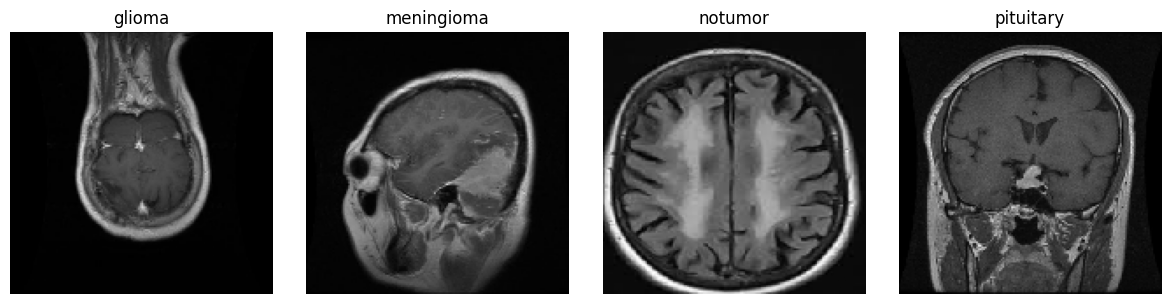

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a single image from each class
def plot_classes(generator, class_names):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Convert labels from one-hot encoding to class indices
    labels = np.argmax(labels, axis=1)

    # Initialize a dictionary to store a single image of each class
    class_images = {}

    # Loop through the batch and store the first image of each class
    for img, label in zip(images, labels):
        class_name = class_names[label]
        if class_name not in class_images:
            class_images[class_name] = img
            if len(class_images) == len(class_names):
                break

    # Plot the images
    fig, axes = plt.subplots(1, len(class_names), figsize=(len(class_names) * 3, 3))
    for i, class_name in enumerate(class_names):
        ax = axes[i]
        ax.imshow(class_images[class_name])
        ax.axis('off')
        ax.set_title(class_name)

    plt.tight_layout()
    plt.show()

# Define class names
class_names = list(train_generator.class_indices.keys())

# Plot a single image of each class side by side
plot_classes(train_generator, class_names)


Exploratory Data Analysis

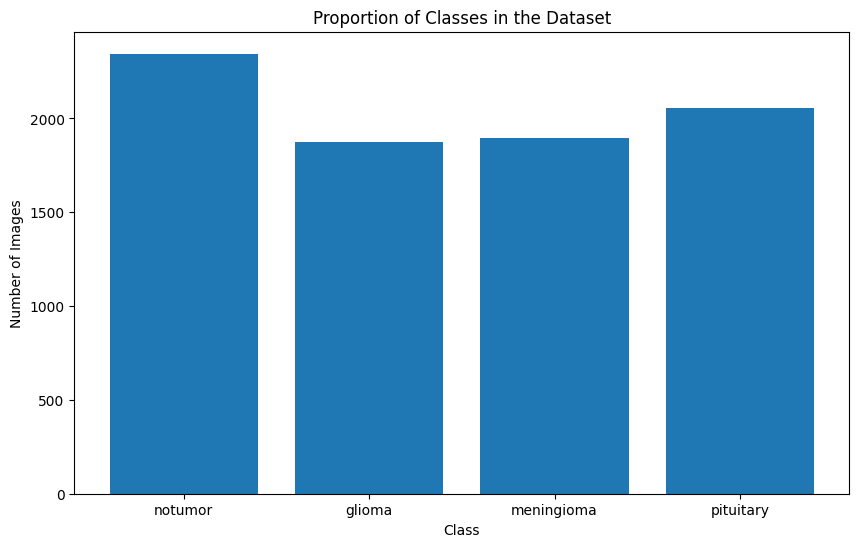

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(directory):

    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return class_counts

# Define directories
train_dir = '/content/drive/MyDrive/KCB AICE/Datasets/Brain-tumor-classification/Training'
val_dir = '/content/drive/MyDrive/KCB AICE/Datasets/Brain-tumor-classification/train_split/validation'
test_dir = '/content/drive/MyDrive/KCB AICE/Datasets/Brain-tumor-classification/Testing'

# Count images in each set
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)
test_counts = count_images_per_class(test_dir)

# Combine counts from all sets
total_counts = train_counts.copy()
for key, val in val_counts.items():
    total_counts[key] = total_counts.get(key, 0) + val
for key, val in test_counts.items():
    total_counts[key] = total_counts.get(key, 0) + val

# Plotting the bar plot
classes = list(total_counts.keys())
counts = list(total_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Proportion of Classes in the Dataset')

plt.show()


Simple CNN for Multiclass classification

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, model_checkpoint]
)



58889256/58889256 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16813124 (64.14 MB)
Trainable params: 2098436 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/143 [==============================] - 28s 195ms/step - loss: 0.4643 - accuracy: 0.8266 - val_loss: 0.2755 - val_accuracy: 0.8942
Epoch 3/20
143/143 [==============================] - 28s 191ms/step - loss: 0.4231 - accuracy: 0.8377 - val_loss: 0.2954 - val_accuracy: 0.8855
Epoch 4/20
143/143 [==============================] - 28s 197ms/step - loss: 0.3864 - accuracy: 0.8546 - val_loss: 0.2569 - val_accuracy: 0.9073
Epoch 5/20
143/143 [==============================] - 28s 194ms/step - loss: 0.3401 - accuracy: 0.8670 - val_loss: 0.2486 - val_accuracy: 0.9021
Epoch 6/20
143/143 [==============================] - 29s 200ms/step - loss: 0.3232 - accuracy: 0.8810 - val_loss: 0.2321 - val_accuracy: 0.9170
Epoch 7/20
143/143 [==============================] - 28s 196ms/step - loss: 0.3167 - accuracy: 0.8810 - val_loss: 0.2166 - val_accuracy: 0.9161
Epoch 8/20
143/143 [==============================] - 28s 196ms/step - loss: 0.3084 - accuracy: 0.8854 - val_loss: 0.2196 - val_accuracy: 0.9

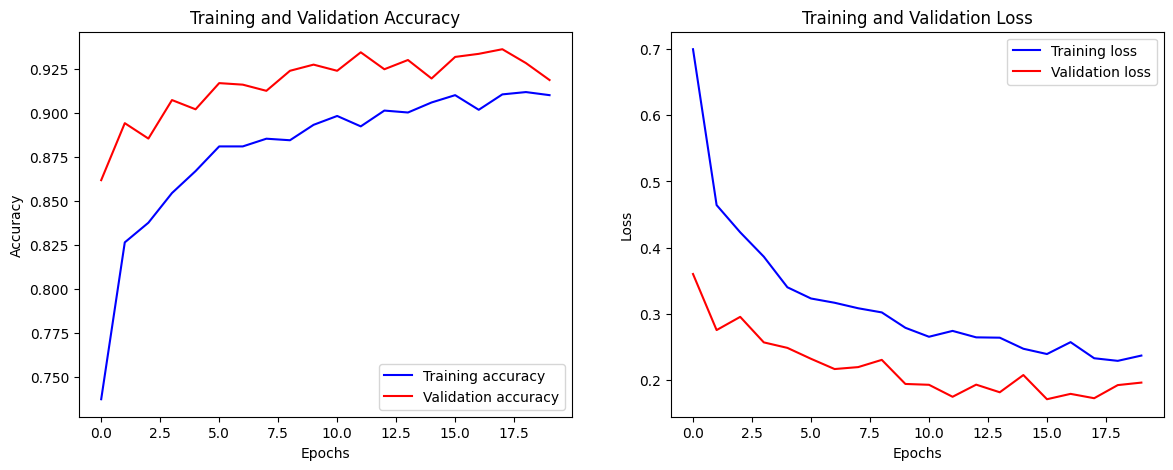

In [ ]:
# Plotting training & validation loss and accuracy
def plot_history(history):
    # Extract loss and accuracy for each epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_history(history)

Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

41/41 [==============================] - 248s 6s/step - loss: 0.2334 - accuracy: 0.9115
Test Accuracy: 91.15%


Classification Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


41/41 [==============================] - 9s 200ms/step
              precision    recall  f1-score   support

      glioma       0.21      0.20      0.21       300
  meningioma       0.23      0.21      0.22       306
     notumor       0.30      0.31      0.31       405
   pituitary       0.18      0.20      0.19       300

    accuracy                           0.24      1311
   macro avg       0.23      0.23      0.23      1311
weighted avg       0.24      0.24      0.24      1311

